# Project Overview

This project analyzes pharmaceutical spending data obtained from the Organisation for Economic Co-operation and Development (OECD). The goal is to understand trends in pharmaceutical spending across various countries and to prepare the dataset for further analysis and modeling.


## Data Sources

The data comes from the following sources:
- **Pharmaceutical Spending Data**: [OECD](https://data.oecd.org/healthres/pharmaceutical-spending.htm)
- **Population Data**: [DataHub](http://datahub.io/core/population)

Additional details about the data fields:
- **LOCATION**: Country code
- **TIME**: Year of the data
- **PC_HEALTHXP**: Percent of health spending
- **PC_GDP**: Percent of GDP
- **USD_CAP**: US dollars per capita
- **FLAG_CODES**: Additional metadata flags
- **TOTAL_SPEND**: Total pharmaceutical spending


# Preprocessing Steps

The data preprocessing includes the following steps:

1. **Loading the Raw Dataset**
   - Load the original CSV file into a DataFrame for initial inspection.

2. **Creating a Copy for Processing**
   - Make a copy of the raw DataFrame to preserve the original data.

3. **Handling Missing Values**
   - Fill missing values in the `FLAG_CODES` column with the placeholder `"Unknown"`.

4. **Converting Data Types**
   - Convert `LOCATION` to a string, `TIME` to an integer, and other numerical columns to floats to ensure consistency.

5. **Saving the Processed Data**
   - Save the cleaned and processed dataset in the `data/processed` directory for future use.

In [24]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [25]:
import warnings

# Suppress only FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
# Specify the path to the CSV file
file_path = 'data/raw/flat-ui__data-Fri Oct 18 2024.csv'

# Load the raw dataset
raw_df = pd.read_csv('../data/raw/flat-ui__data-Fri Oct 18 2024.csv')

# Save the original raw dataset to a standard location
raw_df.to_csv('../data/raw/raw_dataset.csv', index=False)

# Display the first few rows of the DataFrame
raw_df.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76


In [27]:
# Get the number of rows and columns
rows, columns = raw_df.shape

# Print the results
print (f'The dataset contains {rows} observations (rows) and {columns} variables (columns).')

The dataset contains 1036 observations (rows) and 7 variables (columns).


In [28]:
# Display all unique values in the FLAG_CODES column, including NaN
unique_flag_codes = raw_df['FLAG_CODES'].unique()
print("Unique values in the FLAG_CODES column:")
print(unique_flag_codes)

# Display the number of occurrences for each value in the FLAG_CODES column
flag_code_counts = raw_df['FLAG_CODES'].value_counts(dropna=False)
print("\nCounts of each value in the FLAG_CODES column:")
print(flag_code_counts)

Unique values in the FLAG_CODES column:
[nan 'B' 'D' 'P']

Counts of each value in the FLAG_CODES column:
FLAG_CODES
NaN    973
B       46
D       11
P        6
Name: count, dtype: int64


In [29]:
# Create a copy of the raw dataset to work on as processed_df
# This will ensure any processing happens on the copy, not altering the original raw data
processed_df = raw_df.copy()

# Check the current state of the FLAG_CODES column to see how many missing values there are
missing_before = processed_df['FLAG_CODES'].isna().sum()
print(f"Missing values in FLAG_CODES before filling: {missing_before}")


Missing values in FLAG_CODES before filling: 973


In [30]:
#  Fill missing values in the FLAG_CODES column with the placeholder "Unknown"
processed_df['FLAG_CODES'] = processed_df['FLAG_CODES'].fillna('Unknown')

#  Verify that there are no more missing values in the FLAG_CODES column
missing_after = processed_df['FLAG_CODES'].isna().sum()
print(f"Missing values in FLAG_CODES after filling: {missing_after}")

# Display the unique values in the FLAG_CODES column to confirm the addition of "Unknown"
unique_values = processed_df['FLAG_CODES'].unique()
print(f"Unique values in FLAG_CODES after filling: {unique_values}")

Missing values in FLAG_CODES after filling: 0
Unique values in FLAG_CODES after filling: ['Unknown' 'B' 'D' 'P']


In [31]:
# Summary of missing values for each column
missing_values_summary = processed_df.isna().sum()
print("Missing Values Summary:")
print(missing_values_summary)

# Summary of unique values for each column
unique_values_summary = processed_df.nunique()
print("\nUnique Values Summary:")
print(unique_values_summary)

# Display the unique values for each column if you want to see what they are
for column in processed_df.columns:
    unique_values = processed_df[column].unique()
    print(f"\nUnique values in {column}:")
    print(unique_values)

Missing Values Summary:
LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
FLAG_CODES     0
TOTAL_SPEND    0
dtype: int64

Unique Values Summary:
LOCATION         36
TIME             47
PC_HEALTHXP    1009
PC_GDP          756
USD_CAP        1033
FLAG_CODES        4
TOTAL_SPEND    1036
dtype: int64

Unique values in LOCATION:
['AUS' 'AUT' 'BEL' 'CAN' 'CHE' 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA'
 'GBR' 'GRC' 'HUN' 'IRL' 'ISL' 'ISR' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA'
 'MEX' 'NLD' 'NOR' 'NZL' 'POL' 'PRT' 'RUS' 'SVK' 'SVN' 'SWE' 'TUR' 'USA']

Unique values in TIME:
[1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 1970 2016]

Unique values in PC_HEALTHXP:
[15.992 15.091 15.117 ... 11.459 11.384 12.227]

Unique values in PC_GDP:
[0.727 0.686 0.681 0.755 0.682 0.63  0.613 0.591 0

In [32]:
# Convert data types
processed_df['LOCATION'] = processed_df['LOCATION'].astype(str)
processed_df['TIME'] = processed_df['TIME'].astype(int)
processed_df['PC_HEALTHXP'] = processed_df['PC_HEALTHXP'].astype(float)
processed_df['PC_GDP'] = processed_df['PC_GDP'].astype(float)
processed_df['USD_CAP'] = processed_df['USD_CAP'].astype(float)
processed_df['TOTAL_SPEND'] = processed_df['TOTAL_SPEND'].astype(float)


# Save the processed DataFrame
processed_df.to_csv('../data/processed/processed_dataset.csv', index=False)

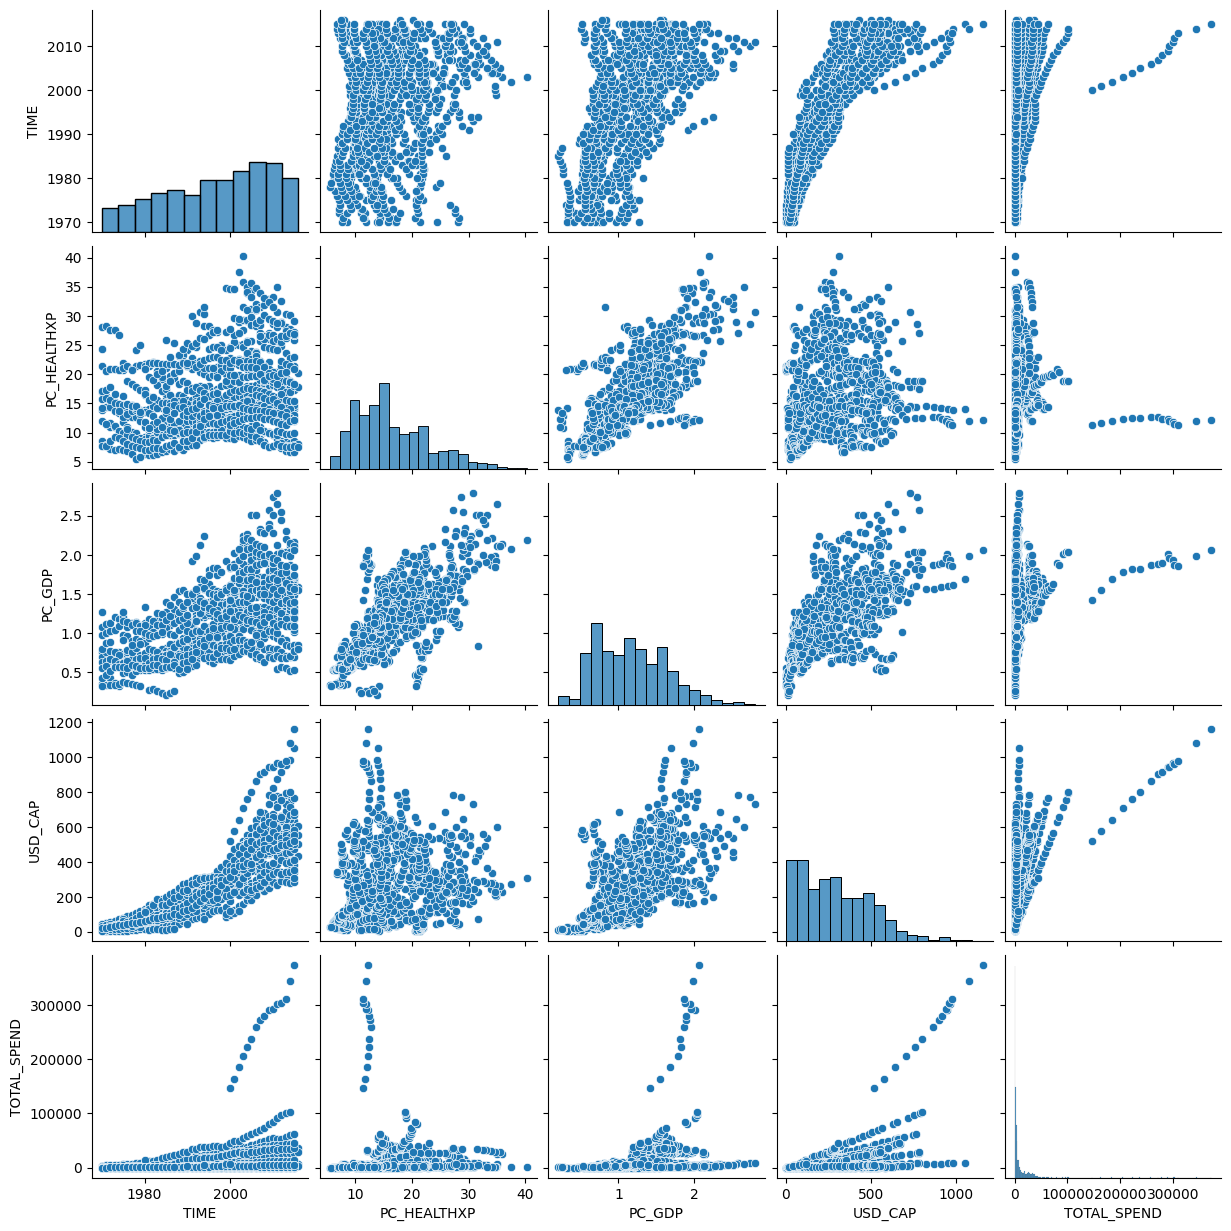

In [33]:
# check the coorelation of each variable by using pairwise plot. 
import seaborn as sns

sns.pairplot(processed_df)

# Linear Regression Analysis

In this section, we will perform simple linear regression to identify trends and patterns in the pharmaceutical spending data. We will focus on finding relationships between:
1. `TIME` (Year) and `TOTAL_SPEND`: To analyze how total pharmaceutical spending has changed over time.
2. `PC_HEALTHXP` (Percent of health spending) and `USD_CAP` (Spending per capita): To observe if there is a relationship between the percentage of health spending and the amount spent per person.
3. `PC_GDP` (Percent of GDP) and `TOTAL_SPEND`: To see how pharmaceutical spending relates to the share of GDP allocated to health.

We will use scatter plots with linear regression lines to visualize these relationships.


# Method1: `TIME` (Year) and `TOTAL_SPEND`: To analyze how total pharmaceutical spending has changed over time.

In [34]:
# Split the sacramento dataset into 75% training data and 25% test data
processed_df_train, processed_df_test = train_test_split(
    processed_df, train_size=0.75, random_state=42
)

In [35]:
# fit the linear regression model
lm_1 = LinearRegression()
lm_1.fit(
   processed_df_train[["TIME"]],  # A single-column data frame (TIME)
   processed_df_train["TOTAL_SPEND"]  # A series (TOTAL_SPEND)
)

# Make a dataframe containing b_1 (slope) and b_0 (intercept) coefficients
pd.DataFrame({"slope": [lm_1.coef_[0]], "intercept": [lm_1.intercept_]})


,slope,intercept
0,718.102964,-1.421605e+06


In [36]:
# make predictions
processed_df_test["predicted"] = lm_1.predict(processed_df_test[["TIME"]])

from sklearn.metrics import mean_squared_error
# calculate RMSPE
RMSPE_1 = mean_squared_error(
    y_true=processed_df_test["TOTAL_SPEND"],
    y_pred=processed_df_test["predicted"]
)**(1/2)

RMSPE_1
print(f"R-sqaured values for the Time and Total spend varible is: {RMSPE_1}")

R-sqaured values for the Time and Total spend varible is: 26565.794756157702


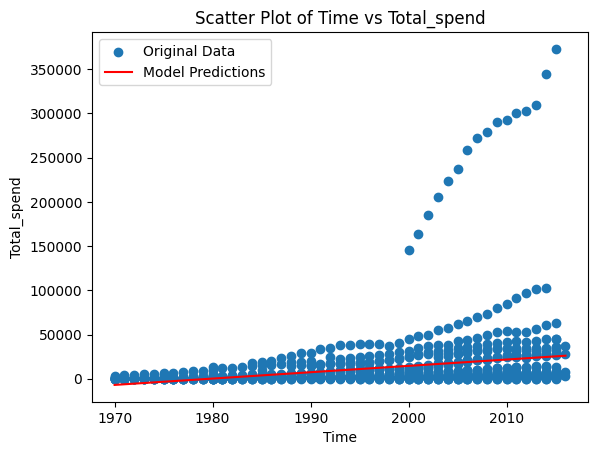

In [37]:
# This line calculates the minimum and maximum values of the "TIME" column in the processed_df dataset.
time_prediction_grid = processed_df[["TIME"]].agg(["min", "max"])

# Uses the linear model to predict TOTAL_SPEND for the min and max Time values.
time_prediction_grid["predicted"] = lm_1.predict(time_prediction_grid)

# Plot the original data
plt.scatter(processed_df["TIME"], processed_df["TOTAL_SPEND"], label='Original Data')

# Plot the model predictions as a line
plt.plot(time_prediction_grid["TIME"], time_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Total_spend')
plt.title('Scatter Plot of Time vs Total_spend')
plt.legend()

# Show the plot
plt.show()

# Method 2: `PC_HEALTHXP` (Percent of health spending) and `USD_CAP` (Spending per capita): To observe if there is a relationship between the percentage of health spending and the amount spent per person.

In [38]:
# fit the linear regression model
lm_2 = LinearRegression()
lm_2.fit(
   processed_df_train[["PC_HEALTHXP"]],  # A single-column data frame (PC_HEALTHXP)
   processed_df_train["USD_CAP"]  # A series (USD_CAP)
)

# Make a dataframe containing b_1 (slope) and b_0 (intercept) coefficients
pd.DataFrame({"slope": [lm_2.coef_[0]], "intercept": [lm_2.intercept_]})


,slope,intercept
0,4.923269,221.790461


In [39]:
# make predictions
processed_df_test["predicted"] = lm_2.predict(processed_df_test[["PC_HEALTHXP"]])

from sklearn.metrics import mean_squared_error
# calculate RMSPE
RMSPE_2 = mean_squared_error(
    y_true=processed_df_test["USD_CAP"],
    y_pred=processed_df_test["predicted"]
)**(1/2)

RMSPE_2
print(f"R-sqaured values for the PC_HEALTHXP and Total spend varible is: {RMSPE_2}")

R-sqaured values for the PC_HEALTHXP and Total spend varible is: 195.48659004422097


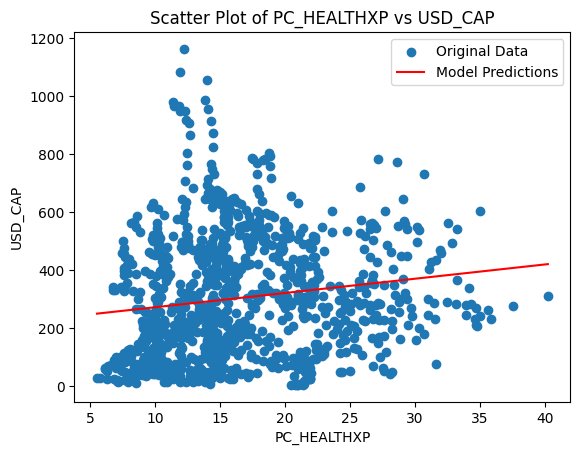

In [40]:
# This line calculates the minimum and maximum values of the "PC_HEALTHXP" column in the processed_df dataset.
PC_HEALTHXP_prediction_grid = processed_df[["PC_HEALTHXP"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
PC_HEALTHXP_prediction_grid["predicted"] = lm_2.predict(PC_HEALTHXP_prediction_grid)

# Plot the original data
plt.scatter(processed_df["PC_HEALTHXP"], processed_df["USD_CAP"], label='Original Data')

# Plot the model predictions as a line
plt.plot(PC_HEALTHXP_prediction_grid["PC_HEALTHXP"], PC_HEALTHXP_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('PC_HEALTHXP')
plt.ylabel('USD_CAP')
plt.title('Scatter Plot of PC_HEALTHXP vs USD_CAP')
plt.legend()

# Show the plot
plt.show()

# Method 3: `PC_GDP` (Percent of GDP) and `TOTAL_SPEND`: To see how pharmaceutical spending relates to the share of GDP allocated to health.

In [41]:
# fit the linear regression model
lm_3 = LinearRegression()
lm_3.fit(
   processed_df_train[["PC_GDP"]],  # A single-column data frame (PC_GDP)
   processed_df_train["TOTAL_SPEND"]  # A series (TOTAL_SPEND)
)

# Make a dataframe containing b_1 (slope) and b_0 (intercept) coefficients
pd.DataFrame({"slope": [lm_3.coef_[0]], "intercept": [lm_3.intercept_]})

,slope,intercept
0,25820.36888,-18057.364004


In [43]:
# make predictions
processed_df_test["predicted"] = lm_3.predict(processed_df_test[["PC_GDP"]])

from sklearn.metrics import mean_squared_error
# calculate RMSPE
RMSPE_3 = mean_squared_error(
    y_true=processed_df_test["TOTAL_SPEND"],
    y_pred=processed_df_test["predicted"]
)**(1/2)

RMSPE_3
print(f"R-sqaured values for the PC_GDP and Total spend varible is: {RMSPE_3}")

R-sqaured values for the PC_GDP and Total spend varible is: 25349.542715976087


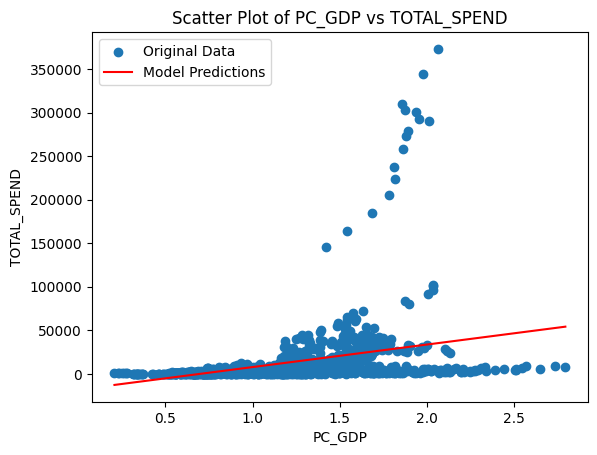

In [44]:
# This line calculates the minimum and maximum values of the "PC_GDP" column in the processed_df dataset.
PC_GDP_prediction_grid = processed_df[["PC_GDP"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
PC_GDP_prediction_grid["predicted"] = lm_3.predict(PC_GDP_prediction_grid)

# Plot the original data
plt.scatter(processed_df["PC_GDP"], processed_df["TOTAL_SPEND"], label='Original Data')

# Plot the model predictions as a line
plt.plot(PC_GDP_prediction_grid["PC_GDP"], PC_GDP_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('PC_GDP')
plt.ylabel('TOTAL_SPEND')
plt.title('Scatter Plot of PC_GDP vs TOTAL_SPEND')
plt.legend()

# Show the plot
plt.show()

## Next Steps

After plotting the linear regression lines, the next steps will include:
1. **Assessing the quality of the linear fit**: We will calculate R-squared values to measure how well the linear model fits the data.
2. **Outlier detection**: Identify and analyze any outliers in the data.
3. **More advanced modeling**: If linear trends are not strong, we may explore more complex models (e.g., polynomial regression or time-series forecasting).
4. **Feature engineering**: Create new features that may better explain variations in the data, such as growth rates or moving averages.
